In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import zscore
import joblib

# For better display
pd.set_option('display.max_columns', None)
print("✅ Libraries imported successfully.")

✅ Libraries imported successfully.


In [2]:
# Load your EV dataset (change filename if needed)
df = pd.read_csv("ev_data.csv")

# Quick look
print(df.shape)
df.head()

(3022, 17)


,Vehicle_ID,Manufacturer,Model,Year,Battery_Type,Battery_Capacity_kWh,Range_km,Charging_Type,Charge_Time_hr,Price_USD,Color,Country_of_Manufacture,Autonomous_Level,CO2_Emissions_g_per_km,Safety_Rating,Units_Sold_2024,Warranty_Years
0,1,Acura,ZDX (with GM Ultium),2015,Lithium-titanate,55.8,214,CHAdeMO,9.0,111203.94,Matte White,UK,0.0,NaN,5.0,19726,3
1,2,Lamborghini,Revuelto (PHEV),2025,Lithium-titanate,90.8,212,Vehicle-to-Home (V2H),7.3,127131.65,White,Netherlands,2.0,0.0,4.0,3349,3
2,3,NIO,ET7,2020,Calcium-ion,64.7,235,Level 2 Charging,8.9,94347.37,Beige,UK,5.0,0.0,5.0,6300,5
3,4,Audi,e-tron,2025,Lithium-iron phosphate,120.5,140,Ultra-Fast Charging (350 kW+),10.5,75615.15,Sunset Orange,Argentina,2.0,0.0,5.0,2339,5
4,5,Acura,ZDX (with GM Ultium),2023,Lithium-titanate,51.8,336,Plug-in Hydrogen Refueling,3.6,141046.94,Ice Silver,United Arab Emirates,2.0,0.0,3.0,1051,4


In [3]:
# 🧹 Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('[^a-z0-9_]', '', regex=True)

# 🧾 Define possible numeric columns (edit if needed)
possible_num_cols = [
    'price_usd', 'battery_kwh', 'range_km', 'efficiency_kwh_per_100km',
    'charging_time_hr', 'motor_power_kw', 'curb_weight_kg', 'sales_units'
]

# ✅ Keep only columns that exist in the dataset
num_cols = [c for c in possible_num_cols if c in df.columns]

# 🧮 Convert numeric columns safely
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')

# 🧱 Fill missing numeric values with median (only for existing numeric columns)
if len(num_cols) > 0:
    df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# 🏷️ Handle categorical columns automatically
cat_cols = df.select_dtypes(include=['object']).columns
if len(cat_cols) > 0:
    df[cat_cols] = df[cat_cols].fillna('Unknown')

# 🧼 Remove duplicates & reset index
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

print("✅ Data cleaned successfully!")
print("Numeric columns:", num_cols)
print("Categorical columns:", cat_cols.tolist())

✅ Data cleaned successfully!
Numeric columns: ['price_usd', 'range_km']
Categorical columns: ['manufacturer', 'model', 'battery_type', 'charging_type', 'color', 'country_of_manufacture']


In [4]:
df.isnull().sum()

vehicle_id                  0
manufacturer                0
model                       0
year                        0
battery_type                0
battery_capacity_kwh        0
range_km                    0
charging_type               0
charge_time_hr              0
price_usd                   0
color                       0
country_of_manufacture      0
autonomous_level          442
co2_emissions_g_per_km    592
safety_rating             337
units_sold_2024             0
warranty_years              0
dtype: int64

✅ Data cleaned successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3022 entries, 0 to 3021
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   vehicle_id              3022 non-null   int64  
 1   manufacturer            3022 non-null   object 
 2   model                   3022 non-null   object 
 3   year                    3022 non-null   int64  
 4   battery_type            3022 non-null   object 
 5   battery_capacity_kwh    3022 non-null   float64
 6   range_km                3022 non-null   int64  
 7   charging_type           3022 non-null   object 
 8   charge_time_hr          3022 non-null   float64
 9   price_usd               3022 non-null   float64
 10  color                   3022 non-null   object 
 11  country_of_manufacture  3022 non-null   object 
 12  autonomous_level        3022 non-null   float64
 13  co2_emissions_g_per_km  3022 non-null   float64
 14  safety_rati

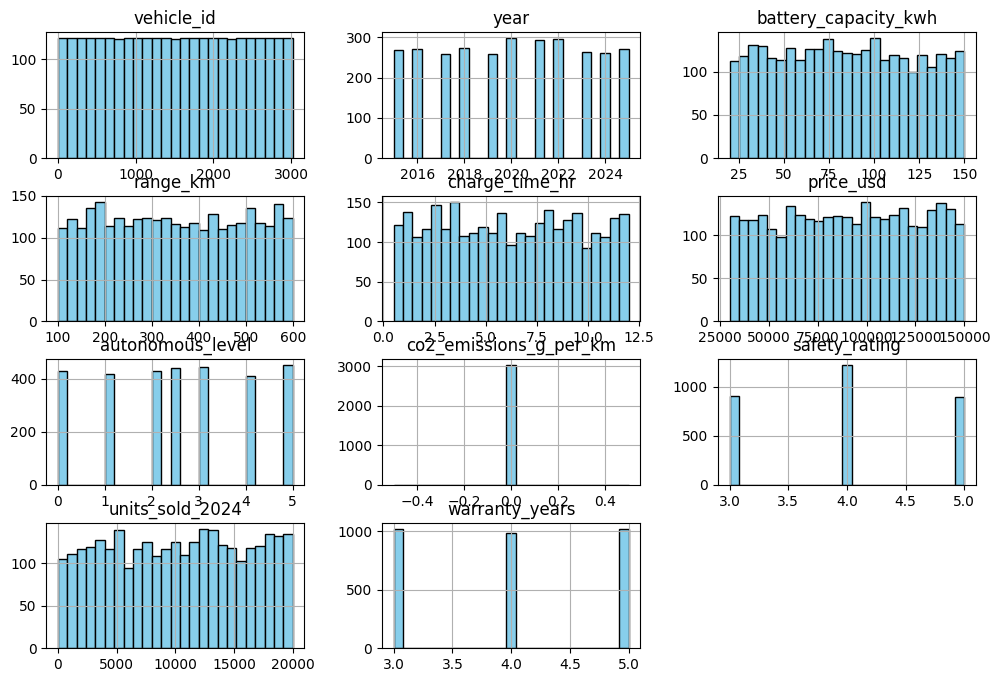

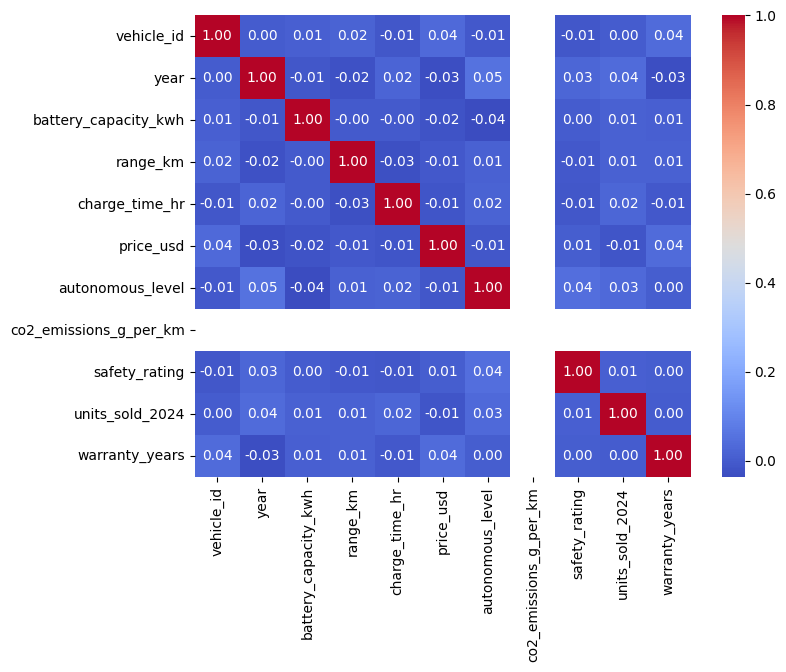

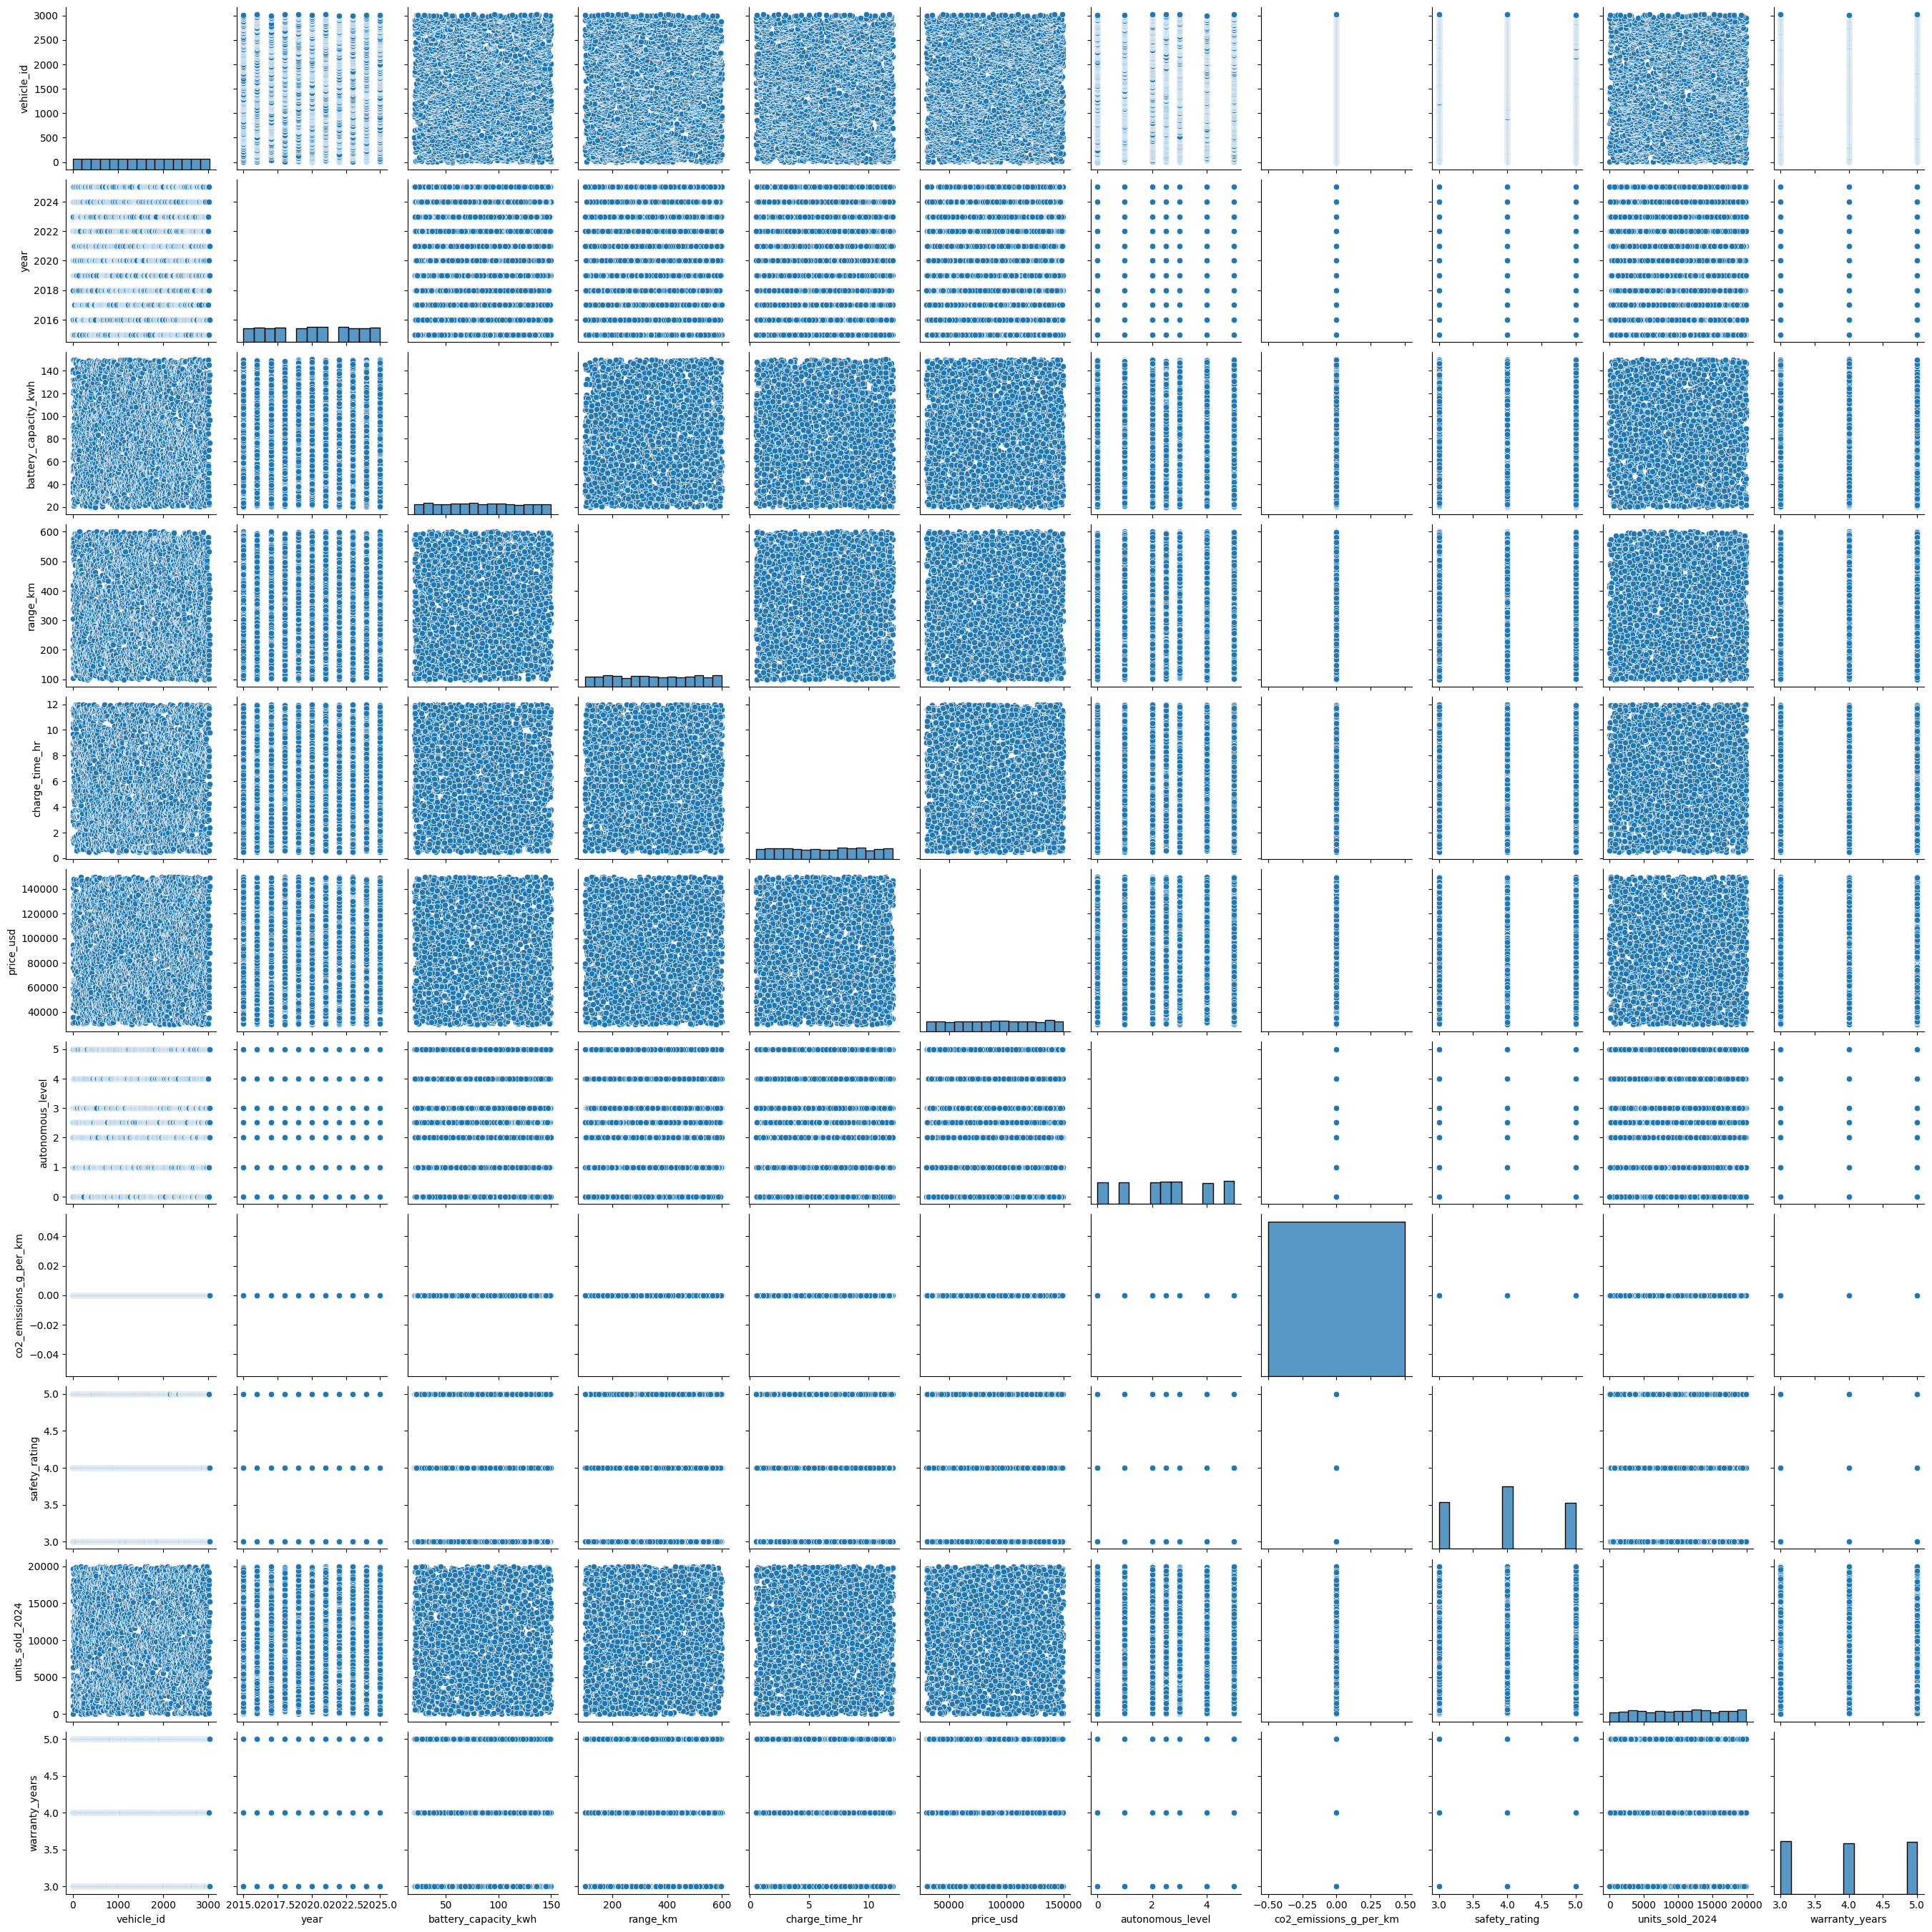

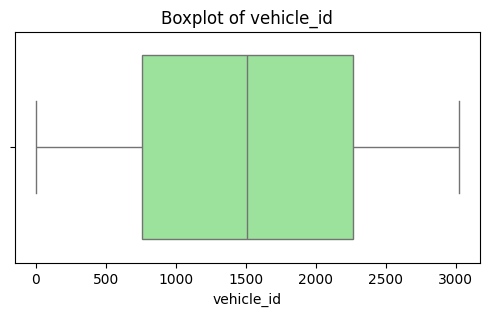

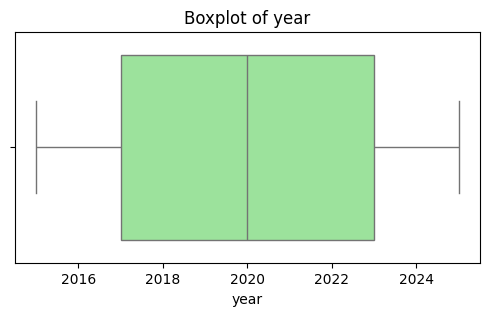

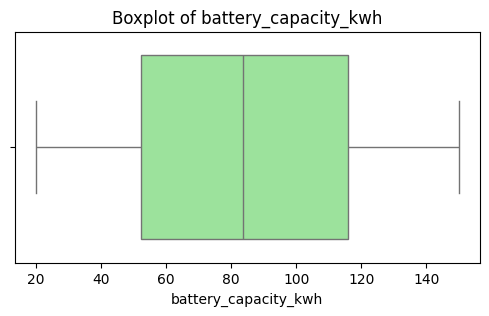

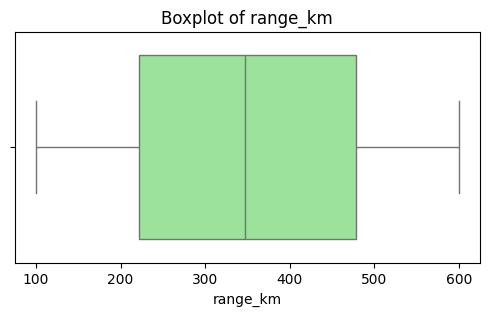

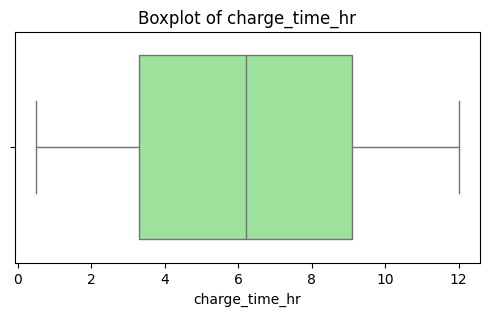

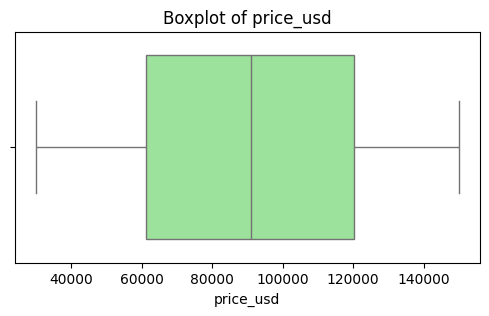

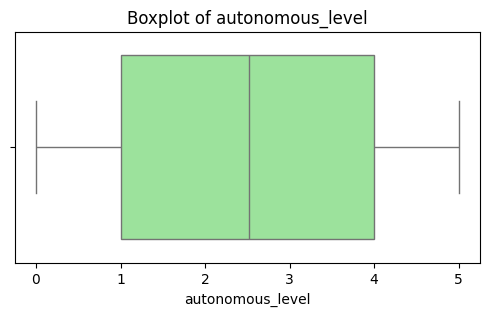

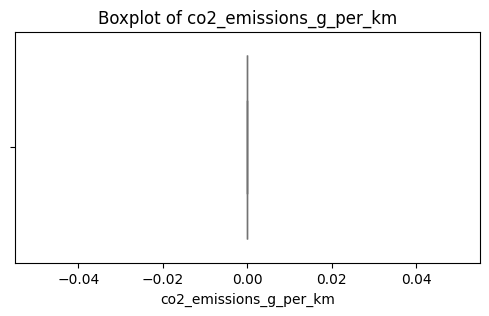

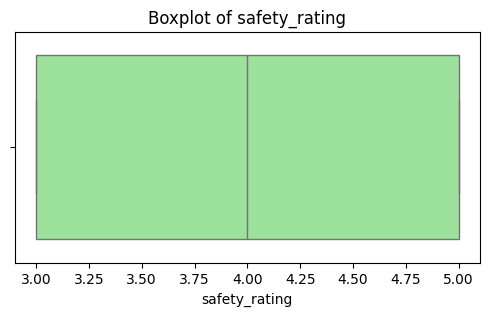

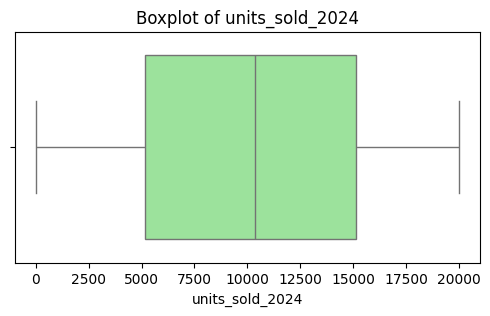

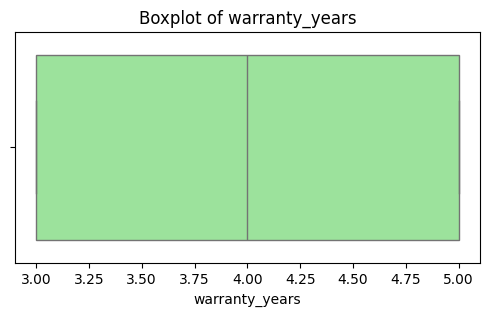

In [ ]:
df = df.drop_duplicates()
df = df.fillna(df.mean(numeric_only=True))
print("✅ Data cleaned successfully!")
print(df.info())

# EXPLORATORY DATA ANALYSIS (EDA)

# Select only numeric columns for analysis
num_cols = df.select_dtypes(include=np.number).columns

# 1️⃣ Check basic dataset details
print("Shape:", df.shape)
print("Missing values:\n", df.isnull().sum())
print("Summary statistics:\n", df.describe())

# 2️⃣ Histogram - shows data distribution
df[num_cols].hist(bins=25, figsize=(12,8), color='skyblue', edgecolor='black')
plt.show()

# 3️⃣ Heatmap - shows correlation between numeric columns
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

# 4️⃣ Pairplot - shows relationships between numeric features
sns.pairplot(df[num_cols])
plt.show()

# 5️⃣ Boxplots - detect outliers visually
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.show()


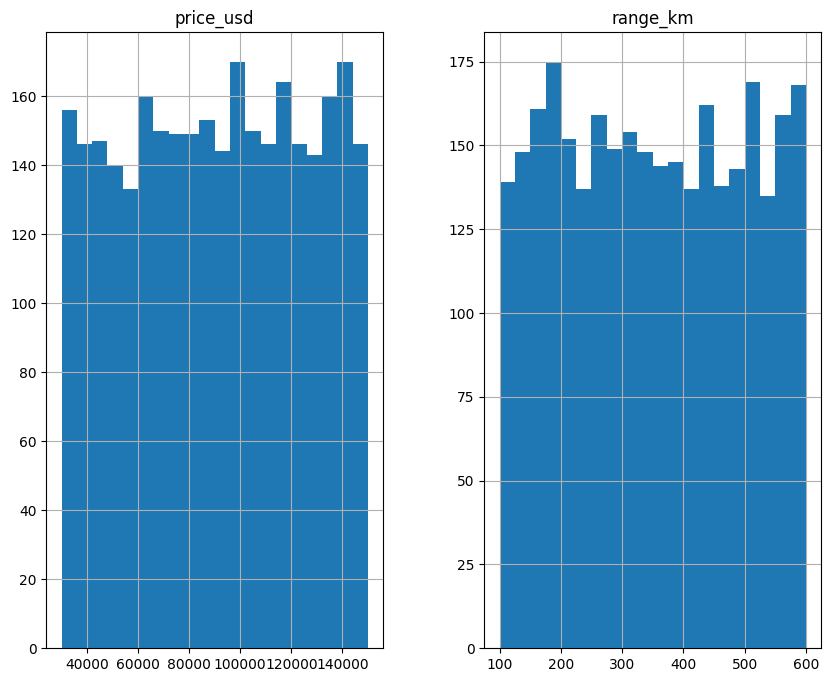

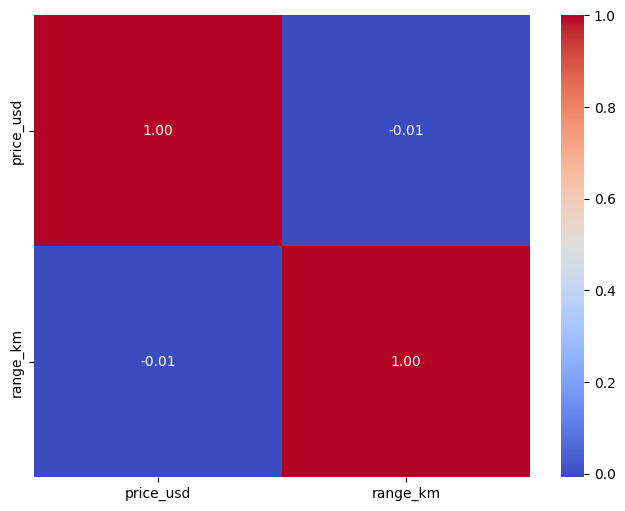

In [5]:
df[num_cols].hist(bins=20, figsize=(10,8))
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()


In [14]:
# 🎯 Define target column
target = 'price_usd'  # change if your dataset uses a different column name

# 🔢 Potential features (we’ll only keep existing ones)
possible_features = [
    'battery_kwh', 'range_km', 'efficiency_kwh_per_100km',
    'charging_time_hr', 'motor_power_kw', 'curb_weight_kg', 'sales_units'
]

# ✅ Select only available columns
features = [col for col in possible_features if col in df.columns]
print("Features being used:", features)

# ✅ Check target column exists
if target not in df.columns:
    raise ValueError(f"Target column '{target}' not found in dataset!")

# 🧠 Split into X and y
X = df[features]
y = df[target]

Features being used: ['range_km']


In [15]:
# Convert continuous price into categories (Low / Medium / High)
y_class = pd.cut(y, bins=3, labels=['Low', 'Medium', 'High'])

# Show category distribution
print(y_class.value_counts())


price_usd
High      1023
Medium    1011
Low        988
Name: count, dtype: int64


In [16]:
X_train, X_test, y_train_reg, y_test_reg = train_test_split(X, y, test_size=0.2, random_state=42)
_, _, y_train_cls, y_test_cls = train_test_split(X, y_class, test_size=0.2, random_state=42)


In [17]:
# Import necessary libraries for Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Pipeline for Logistic Regression
log_reg_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=1000, random_state=42))
])

# Train the classifier
log_reg_pipe.fit(X_train, y_train_cls)

# Predict categories
y_pred_cls = log_reg_pipe.predict(X_test)

# Evaluate
print("🔹 Logistic Regression Classification Report:")
print(classification_report(y_test_cls, y_pred_cls))
print("Confusion Matrix:\n", confusion_matrix(y_test_cls, y_pred_cls))

🔹 Logistic Regression Classification Report:
              precision    recall  f1-score   support

        High       0.31      0.57      0.40       196
         Low       0.00      0.00      0.00       203
      Medium       0.34      0.42      0.38       206

    accuracy                           0.33       605
   macro avg       0.22      0.33      0.26       605
weighted avg       0.22      0.33      0.26       605

Confusion Matrix:
 [[111   0  85]
 [123   0  80]
 [120   0  86]]


C:\Users\aarya\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\aarya\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\aarya\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train_reg)
y_pred_reg = rf_model.predict(X_test)

print("\n🔹 Random Forest Regression Results:")
print("MAE:", mean_absolute_error(y_test_reg, y_pred_reg))
print("MSE:", mean_squared_error(y_test_reg, y_pred_reg))
print("R² :", r2_score(y_test_reg, y_pred_reg))



🔹 Random Forest Regression Results:
MAE: 32512.46921815892
MSE: 1471270806.702843
R² : -0.241288938879602


In [19]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
xgb_model.fit(X_train, y_train_reg)
y_pred_xgb = xgb_model.predict(X_test)

print("\n🔹 XGBoost Regression Results:")
print("R² :", r2_score(y_test_reg, y_pred_xgb))



🔹 XGBoost Regression Results:
R² : -0.06301203621174745


In [20]:
import joblib

joblib.dump(log_reg_pipe, "ev_price_category_classifier.joblib")
joblib.dump(rf_model, "ev_price_predictor_randomforest.joblib")
joblib.dump(xgb_model, "ev_price_predictor_xgboost.joblib")

print("✅ All models saved successfully!")


✅ All models saved successfully!
